In [1]:
import os
os.chdir(os.path.expanduser('~/My Drive/dirclip-private/core'))

In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import vmap
import datasets, utils

In [3]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

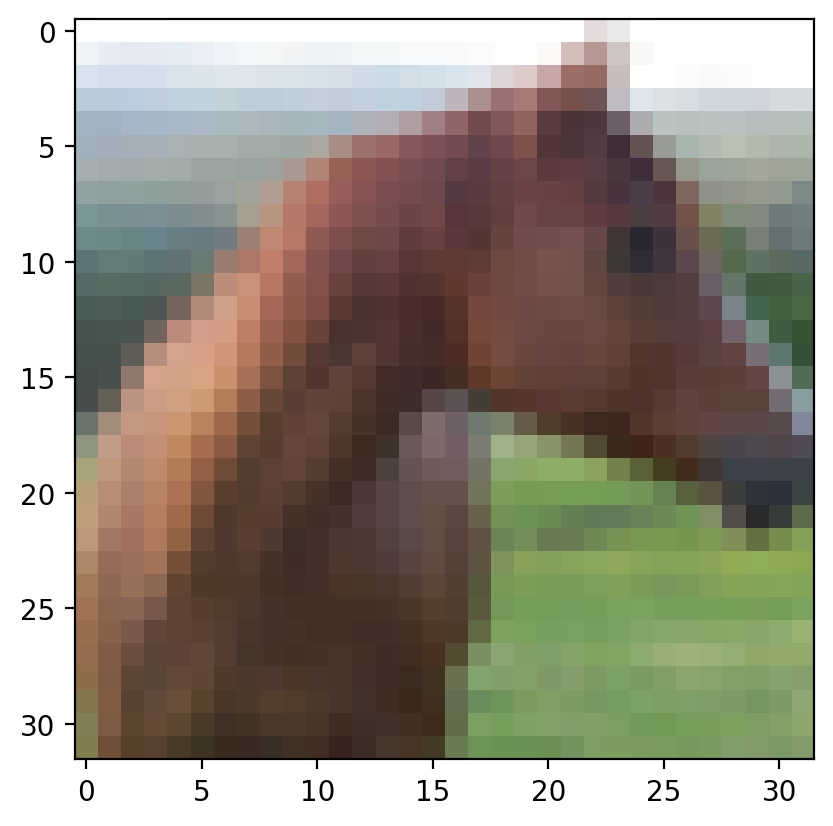

In [4]:
# load image
ds_name = 'cifar10'
x, y, _ = datasets.load(ds_name, 'test')
image = x[6]
plt.imshow(datasets.unnormalize(image, ds_name))
plt.show()

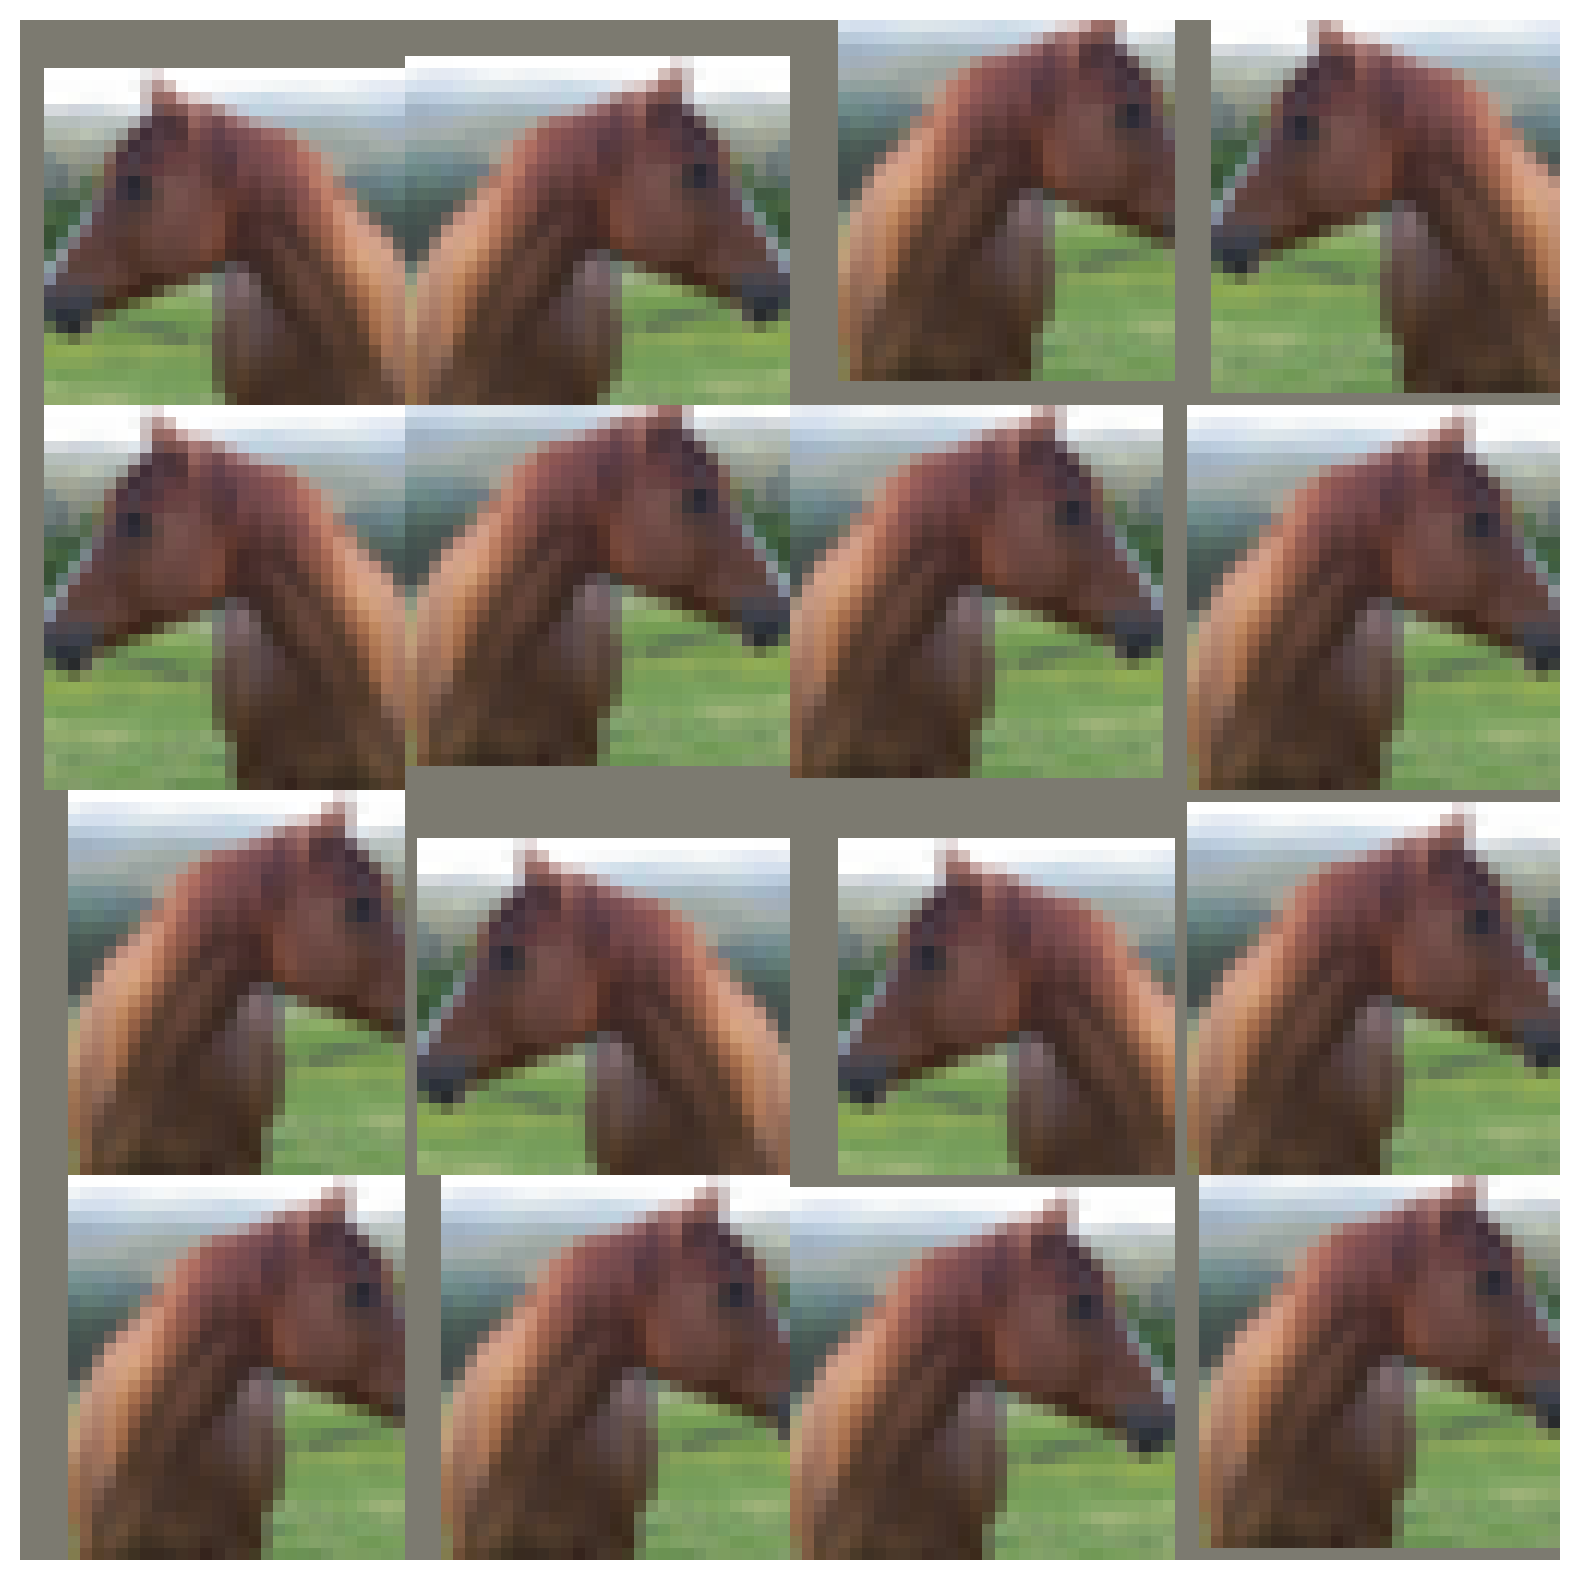

In [5]:
# test
key = jax.random.PRNGKey(2)
keys = jax.random.split(key, 16)
image_augs = vmap(lambda key: utils.augment(key, image[None])[0])(keys)
grid = utils.image_grid(image_augs, 4, 4)
fig, ax = plt.subplots(figsize=[10, 10])
ax.imshow(datasets.unnormalize(grid, ds_name))
ax.axis('off')
plt.show()